In [1]:
# Installer la librairie pymongo binary dans l'environnement virtuel
# Paquet Python pour MongoDB
import pymongo

In [2]:
# Pour la lecture des fichier csv
import csv

In [3]:
# MongoClient pour connexion à MongoDB
from pymongo import MongoClient

In [4]:
# Connexion à MongoDB et accès aux abjets de la base de données
connexion = pymongo.MongoClient('localhost', 27017)

In [5]:
# Création Dbb
database = connexion['Floupics_Mongo']

In [6]:
# Création document movies
collection = database['movies']

In [7]:
# Chemin vers fichier csv movies.csv
path_movies = 'data/movies.csv'

#### CREER UNE BDD MONGOBD A PARTIR D'UN FICHIER CSV
Clé_Id ---> UUID générée par MongoBD

In [8]:
# Fonction lire fichier csv
def lire_csv_dict(path_file) :
    
    try:
        data = []
        with open(path_file, encoding='utf-8') as csvfile: 
            reader = csv.DictReader(csvfile)
            for rows in reader:
                data.append(rows)
        return data

    except:
        print('une erreur est survenue')

In [9]:
# Fonction lire fichier csv fichier movies.csv appelant fonction chemin vers movies
movies = lire_csv_dict(path_movies)

In [10]:
# Insérer les données dans le document movies avec la méthode .insert_many
try:
    collection.insert_many(movies)
    print('Fichier Importé avec succés !!')
except:
    print('Les données sont déjà insérées')

Fichier Importé avec succés !!


In [11]:
# Afficher liste des documents de la Dbb, ne s'affiche qu'une fois les données importées
database.list_collection_names()

['movies']

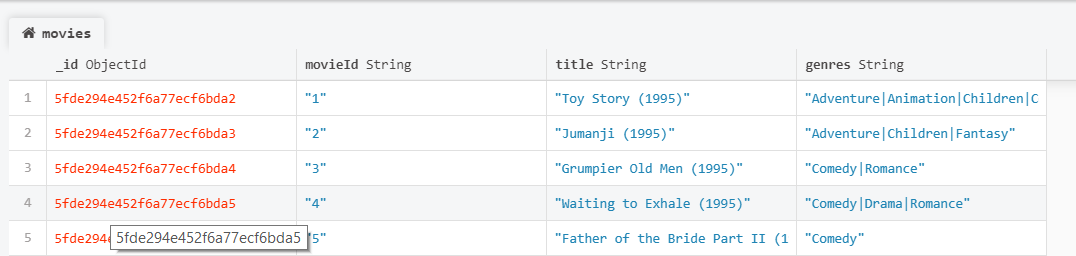

In [12]:
from IPython.display import Image
Image("Pics/Mongo-movies1.png")

#### CREER UNE BDD MONGOBD A PARTIR D'UN FICHIER JSON
Clé_Id ---> UUID générée par MongoBD

In [13]:
import json

In [14]:
# Chemin et nom du nouveau fichier Json fichier 
path_json2 = r'data/movies2.json'

In [15]:
def creer_json(path_json2):
    data = []
    with open(path_movies, encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for rows in reader:
            data.append(rows)

            # Enregistrer le fichier JSON
    with open(path_json2, 'w') as jsonFile:
        jsonFile.write(json.dumps(data, indent=4))
    print("Fichier JSON enregistré!")

In [16]:
movies_Json2 = creer_json(path_json2)

Fichier JSON enregistré!


In [17]:
database_Json2 = connexion['Floupics_Mongo_JSON2']

In [18]:
collection_Json2 = database_Json2['movies']

In [19]:
# Importer les données du fichier Json vers MongoBDD
# Ne pas réitérer sinon doublons
def inserer_donnees_Json(path_json2):
    with open(path_json2) as jsf:
        file_data = json.load(jsf)

    collection_Json2.insert_many(file_data)
    print('Fichier Importé avec succés !!')

In [20]:
movies_insert_Json2 = inserer_donnees_Json(path_json2)

Fichier Importé avec succés !!


### AFFICHER LES PREMIERS ENREGISTREMENTS DE LA BDD

In [21]:
for movie in database.movies.find( {} ).limit(3):
    print(movie)

{'_id': ObjectId('5fe0553b4a19c7a77280efbe'), 'movieId': '1', 'title': 'Toy Story (1995)', 'genres': 'Adventure|Animation|Children|Comedy|Fantasy'}
{'_id': ObjectId('5fe0553b4a19c7a77280efbf'), 'movieId': '2', 'title': 'Jumanji (1995)', 'genres': 'Adventure|Children|Fantasy'}
{'_id': ObjectId('5fe0553b4a19c7a77280efc0'), 'movieId': '3', 'title': 'Grumpier Old Men (1995)', 'genres': 'Comedy|Romance'}


### AFFICHER UN ENREGISTREMENT EN PARTICULIER, EXEMPLE FILM ID # 19

In [22]:
movie_search1 = collection.find_one({'movieId' : '213' })
print(movie_search1)

{'_id': ObjectId('5fe0553b4a19c7a77280f073'), 'movieId': '213', 'title': 'Burnt by the Sun (Utomlyonnye solntsem) (1994)', 'genres': 'Drama'}


In [23]:
movie_search2 = collection_Json2.find_one({'movieId' : '213' })
print(movie_search2)

{'_id': ObjectId('5fe0553c4a19c7a772811681'), 'movieId': '213', 'title': 'Burnt by the Sun (Utomlyonnye solntsem) (1994)', 'genres': 'Drama'}


### AFFICHER LES NOMS DES CHAMPS DU RESULTAT

In [24]:
for nom_champs in movie_search1 :
    print(nom_champs)

_id
movieId
title
genres


In [25]:
connexion.close()